In [1]:
import pandas as pd

df = pd.read_csv("data2_processed.csv")

# 计算每列的空值比例
missing_ratio = df.isnull().mean()
print(missing_ratio.sort_values(ascending=False))

机型属性        0.946943
序列前缀        0.901319
生产日期        0.810094
故障原因代码      0.615800
维修措施        0.613786
序列标识        0.490674
供应商代码       0.489679
序列号         0.445073
实际服务方式      0.387377
产品型号        0.141561
购机日期        0.096967
设备年龄(月)     0.096967
购买价格        0.062563
区域编码        0.004232
服务商代码       0.004232
产线代码        0.000144
市场级别        0.000012
保修类型        0.000000
产品大类        0.000000
设备来源        0.000000
购买价格_修正     0.000000
是否过保        0.000000
是否在保        0.000000
质检等级        0.000000
预约日期        0.000000
日期批次        0.000000
服务商代码_清洗    0.000000
序列解析        0.000000
服务等级        0.000000
序列编号        0.000000
品牌          0.000000
服务区域        0.000000
服务商类型       0.000000
价格等级        0.000000
dtype: float64


In [4]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# 1. 读取数据
df = pd.read_csv("data2_processed.csv")

# 2. 创建故障-措施关联矩阵
fault_measures = pd.crosstab(
    index=df['故障原因代码'], 
    columns=df['维修措施']
)

# 3. 转换为布尔型矩阵或整数型矩阵
# 布尔型：
fault_measures_bool = fault_measures > 0  # True/False
# 整数型：
fault_measures_int = (fault_measures > 0).astype(int)

# 4. 挖掘频繁项集（使用布尔型矩阵）
frequent_itemsets = apriori(
    fault_measures_bool, 
    min_support=0.05, 
    use_colnames=True
)

# 5. 提取关联规则
rules = association_rules(
    frequent_itemsets, 
    metric="lift", 
    min_threshold=1.5
)
# 输出强规则
print(rules.sort_values('lift', ascending=False).head())

   antecedents consequents  antecedent support  consequent support   support  \
10    (鉴定, 换机)        (退机)            0.283981            0.082524  0.075243   
11        (退机)    (鉴定, 换机)            0.082524            0.283981  0.075243   
0         (退机)        (换机)            0.082524            0.293689  0.075243   
1         (换机)        (退机)            0.293689            0.082524  0.075243   
8     (退机, 鉴定)        (换机)            0.082524            0.293689  0.075243   

    confidence      lift  representativity  leverage  conviction  \
10    0.264957  3.210659               1.0  0.051807    1.248194   
11    0.911765  3.210659               1.0  0.051807    8.114887   
0     0.911765  3.104521               1.0  0.051006    8.004854   
1     0.256198  3.104521               1.0  0.051006    1.233495   
8     0.911765  3.104521               1.0  0.051006    8.004854   

    zhangs_metric   jaccard  certainty  kulczynski  
10       0.961618  0.258333   0.198842    0.588361  
11  

品牌在不同市场级别的分布比例：
市场级别  一类地区  二类地区  三类地区  四类地区
品牌                          
哈士奇   0.21  0.33  0.40  0.06
康拜恩   0.15  0.40  0.38  0.08
澳柯玛   0.40  0.33  0.25  0.02
西门子   0.25  0.33  0.39  0.03

品牌在各市场级别的销售占比：
市场级别  一类地区  二类地区  三类地区  四类地区
品牌                          
哈士奇   0.21  0.33  0.40  0.06
康拜恩   0.15  0.40  0.38  0.08
澳柯玛   0.40  0.33  0.25  0.02
西门子   0.25  0.33  0.39  0.03


C:\Users\symp\AppData\Local\Temp\ipykernel_19768\1711046990.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_market = df.groupby(['品牌', '市场级别']).size().unstack(fill_value=0)
C:\Users\symp\AppData\Local\Temp\ipykernel_19768\1711046990.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_market = df.groupby(['品牌', '市场级别']).size().unstack()


<Figure size 1000x600 with 0 Axes>

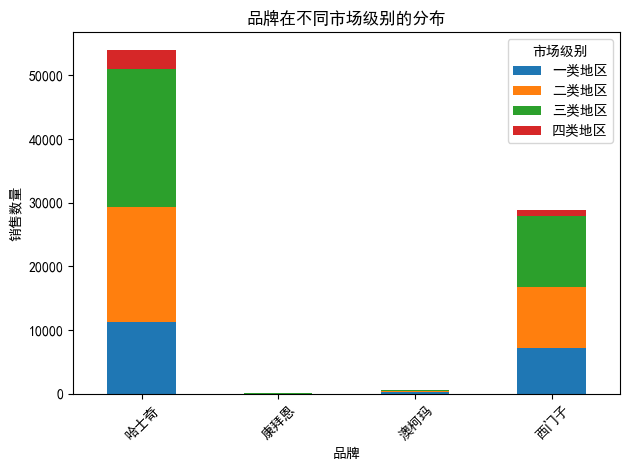

C:\Users\symp\AppData\Local\Temp\ipykernel_19768\1711046990.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_market_percent = df.groupby(['品牌', '市场级别']).size().unstack(fill_value=0)


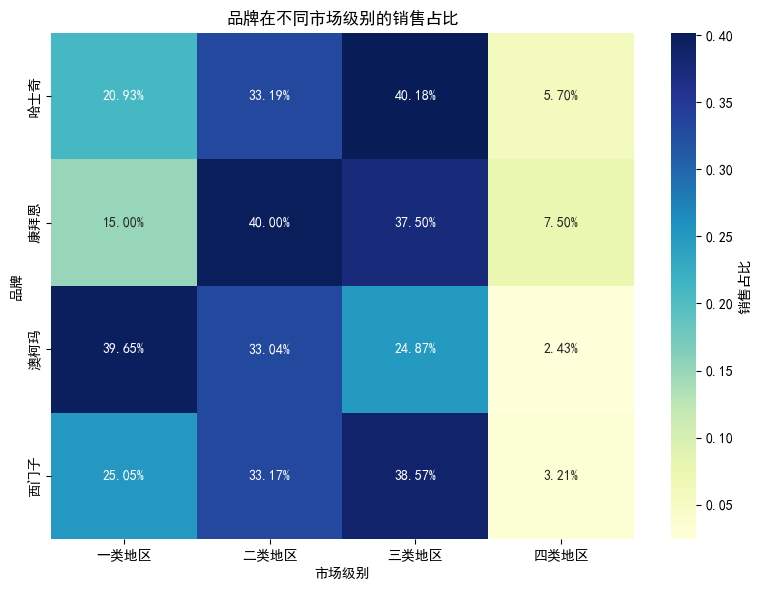

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置中文字体（解决中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 数据读取 ---
def load_data(file_path):
    """读取CSV或Excel数据"""
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        raise ValueError("仅支持CSV或Excel格式文件")
    return df
    
# --- 自定义分类顺序 ---
def set_category_order(df):
    """定义市场级别的顺序"""
    market_order = pd.CategoricalDtype(
        categories=["一类地区", "二类地区", "三类地区", "四类地区"], 
        ordered=True
    )
    df["市场级别"] = df["市场级别"].astype(market_order)
    return df
    
# --- 品牌与市场级别的关联分析 ---
def analyze_brand_market(df):
    """统计品牌在不同市场级别的分布比例"""
    # 1. 交叉表（品牌 vs 市场级别）
    cross_table = pd.crosstab(df['品牌'], df['市场级别'], normalize='index').round(2)
    
    # 2. 数据透视表（计算每个品牌在各市场级别的销售占比）
    brand_market = df.groupby(['品牌', '市场级别']).size().unstack(fill_value=0)
    brand_market_percent = brand_market.div(brand_market.sum(axis=1), axis=0).round(2)
    
    return cross_table, brand_market_percent

# --- 可视化 ---
def plot_brand_market(df):
    """绘制品牌与市场级别的分布图"""
    # 1. 堆叠柱状图（品牌 vs 市场级别）
    plt.figure(figsize=(10, 6))
    brand_market = df.groupby(['品牌', '市场级别']).size().unstack()
    brand_market.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title("品牌在不同市场级别的分布")
    plt.xlabel("品牌")
    plt.ylabel("销售数量")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. 热力图（品牌 vs 市场级别的销售比例）
    plt.figure(figsize=(8, 6))
    brand_market_percent = df.groupby(['品牌', '市场级别']).size().unstack(fill_value=0)
    brand_market_percent = brand_market_percent.div(brand_market_percent.sum(axis=1), axis=0)
    sns.heatmap(brand_market_percent, annot=True, fmt=".2%", cmap="YlGnBu", cbar_kws={'label': '销售占比'})
    plt.title("品牌在不同市场级别的销售占比")
    plt.tight_layout()
    plt.show()

# --- 主程序 ---
if __name__ == "__main__":
    # 1. 加载数据
    file_path = "data2_processed.csv"  # 替换为你的数据路径
    df = load_data(file_path)
    df = set_category_order(df)
    # 2. 分析品牌与市场级别的关联
    cross_table, brand_market_percent = analyze_brand_market(df)
    print("品牌在不同市场级别的分布比例：")
    print(cross_table)
    print("\n品牌在各市场级别的销售占比：")
    print(brand_market_percent)
    
    # 3. 可视化
    plot_brand_market(df)

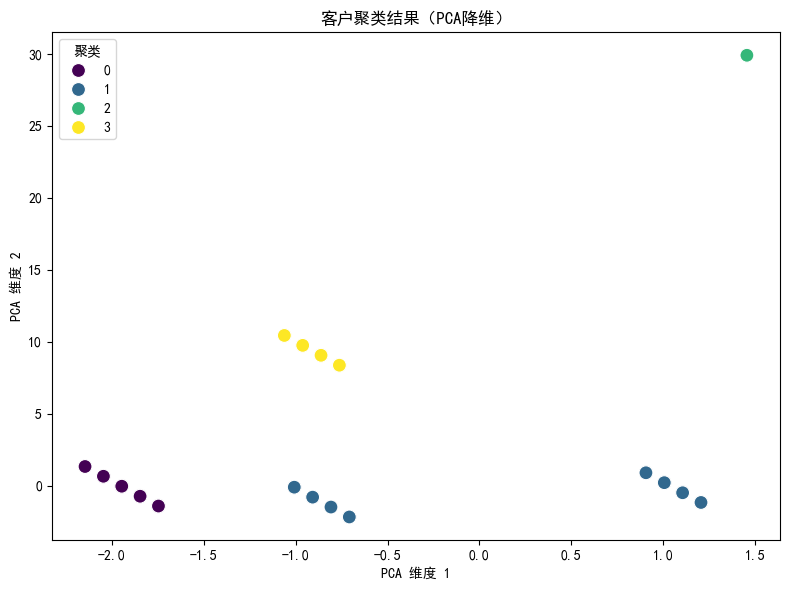

聚类特征分析：
    品牌_哈士奇  品牌_康拜恩  品牌_澳柯玛  品牌_西门子  市场级别  购买价格_修正
聚类                                               
0    -1.36   -0.02   -0.08    1.38 -0.08    -0.00
1     0.74    0.01   -0.08   -0.73  0.05    -0.00
2     0.74   -0.02   -0.08   -0.73 -0.31   288.25
3    -1.36   -0.02   12.00   -0.73 -0.42    -0.02


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 数据读取 ---
def load_data(file_path):
    """读取CSV或Excel数据"""
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        raise ValueError("仅支持CSV或Excel格式文件")
    return df

# --- 数据预处理 ---
def preprocess_data(df):
    """处理分类变量并标准化数据"""
    
    selected_columns = ["购买价格_修正", "品牌", "市场级别"]
    df_selected = df[selected_columns].copy()
    
    # 1. 定义市场级别的有序编码
    market_order = pd.CategoricalDtype(
        categories=["一类地区", "二类地区", "三类地区", "四类地区"], 
        ordered=True
    )
    df_selected["市场级别"] = df_selected["市场级别"].astype(market_order).cat.codes  # 转换为有序编码（0-3）

    # 2. 品牌One-Hot编码
    brand_dummies = pd.get_dummies(df["品牌"], prefix="品牌")

    # 3. 合并特征
    X = pd.concat([brand_dummies, df_selected[["市场级别", "购买价格_修正"]]], axis=1)

    # 4. 标准化数据
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, X.columns  # 返回标准化后的数据和特征名称

# --- 聚类分析 ---
def cluster_analysis(X_scaled, n_clusters=4):
    """使用K-Means进行聚类"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    return clusters

# --- 可视化 ---
def plot_clusters(X_scaled, clusters):
    """可视化聚类结果（使用PCA降维）"""
    # 1. 降维至2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # 2. 绘制散点图
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", s=100)
    plt.title("客户聚类结果（PCA降维）")
    plt.xlabel("PCA 维度 1")
    plt.ylabel("PCA 维度 2")
    plt.legend(title="聚类")
    plt.tight_layout()
    plt.show()

# --- 聚类结果解释 ---
def interpret_clusters(df, clusters, feature_names):
    """分析每个聚类的特征"""
    # 将聚类结果合并到预处理后的数据中
    X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)
    X_scaled_df["聚类"] = clusters

    # 计算每个聚类的特征均值
    cluster_summary = X_scaled_df.groupby("聚类")[feature_names].mean().round(2)
    print("聚类特征分析：")
    print(cluster_summary)
    return cluster_summary

# --- 主程序 ---
if __name__ == "__main__":
    # 1. 加载数据
    file_path = "data2_processed.csv"  # 替换为你的数据路径
    df = load_data(file_path)

    # 2. 数据预处理
    X_scaled, feature_names = preprocess_data(df)

    # 3. 聚类分析（假设分为2类）
    n_clusters = 4
    clusters = cluster_analysis(X_scaled, n_clusters)

    # 4. 将聚类结果合并到原始数据
    df["聚类"] = clusters

    # 5. 可视化聚类结果
    plot_clusters(X_scaled, clusters)

    # 6. 分析聚类特征
    cluster_summary = interpret_clusters(X_scaled, clusters, feature_names)


故障预警模型构建
目标变量分布:
未来90天故障
1.0    0.934291
0.0    0.065709
Name: proportion, dtype: float64
目标变量中NaN的数量: 15659
警告: 目标变量包含NaN值，正在删除这些行
删除后剩余样本数: 20058
特征中NaN的数量: 314599
警告: 特征包含NaN值，正在填充

模型评估报告:
              precision    recall  f1-score   support

         0.0       0.78      0.05      0.10       395
         1.0       0.94      1.00      0.97      5623

    accuracy                           0.94      6018
   macro avg       0.86      0.53      0.53      6018
weighted avg       0.93      0.94      0.91      6018

原始阈值: 0.5, 最佳阈值: 0.7863 (F1分数: 0.9679)

优化阈值后的评估报告:
              precision    recall  f1-score   support

         0.0       0.61      0.18      0.28       395
         1.0       0.95      0.99      0.97      5623

    accuracy                           0.94      6018
   macro avg       0.78      0.59      0.62      6018
weighted avg       0.92      0.94      0.92      6018



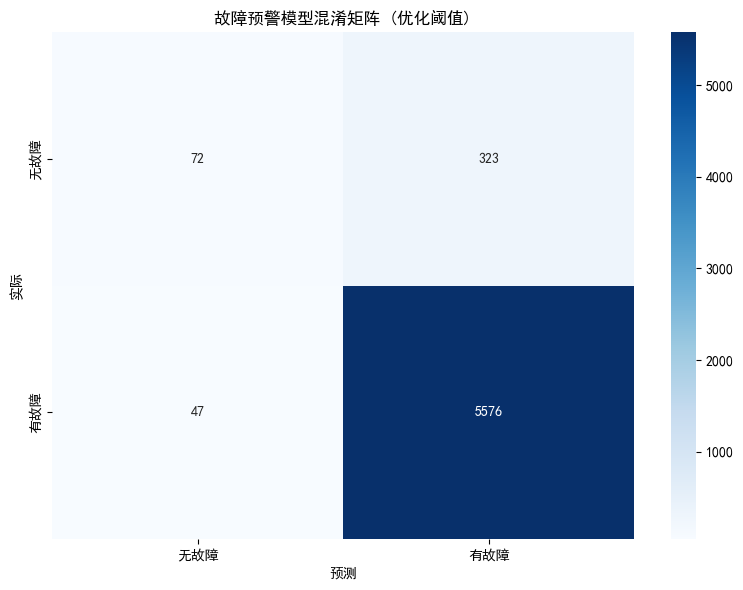


各品牌预警效果:
    品牌       准确率       召回率  设备数量      故障比例
2  澳柯玛  0.583333  1.000000    12  0.250000
0  西门子  0.930590  0.994105  2017  0.925136
1  哈士奇  0.943595  0.990410  3989  0.941088

预警效果最差的品牌: 哈士奇 (召回率: 0.99)

模型已保存为 'failure_prediction_model.pkl'

冰箱品牌故障分析报告
分析报告已生成: refrigerator_failure_analysis_report.md


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
import re
import warnings
import pmdarima as pm
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载清洗后的数据
a = pd.read_excel('data2_processed1.xlsx')
b = a
target_columns1 = ['维修措施'] 
target_columns2 = ['实际服务方式']
df_cleaned1 = a[target_columns1].replace('', pd.NA)
df_cleaned2 = b[target_columns2].replace('', pd.NA)
mask = (
    df_cleaned1.notna().all(axis=1) &
    ~a[target_columns1].isin(['上门解释指导', '鉴定']).any(axis=1)
)
mask1 = (df_cleaned2.notna().all(axis=1))
df = a[mask] 
c=b[mask1]
df['购机日期'] = pd.to_datetime(df['购机日期'], format='%Y/%m/%d', errors='coerce')

def failure_prediction_model(df):
    """构建冰箱故障预警模型"""
    print("\n" + "="*50)
    print("故障预警模型构建")
    print("="*50)
    
    # 复制数据，避免修改原始数据
    features = df.copy()
    
    # 确保日期格式正确
    features['预约日期'] = pd.to_datetime(features['预约日期'], errors='coerce')
    features = features.dropna(subset=['预约日期'])
    
    # 创建目标变量：未来90天内是否会发生故障
    features = features.sort_values(['产品型号', '预约日期'])
    
    # 计算下次维修日期和间隔
    features['下次维修日期'] = features.groupby('产品型号')['预约日期'].shift(-1)
    features['故障间隔(天)'] = (features['下次维修日期'] - features['预约日期']).dt.days
    
    # 创建目标变量 - 使用更安全的方法避免NaN
    features['未来90天故障'] = 0  # 默认值为0
    mask = features['下次维修日期'].notna()
    features.loc[mask, '未来90天故障'] = (features.loc[mask, '故障间隔(天)'] <= 90).astype(int)
    
    # 确保目标变量是整数类型
    features['未来90天故障'] = features['未来90天故障'].astype(int)
    
    # 特征工程
    # 1. 设备特征
    # 确保设备年龄是数值型
    if '设备年龄(月)' in features.columns:
        features['设备年龄(月)'] = pd.to_numeric(features['设备年龄(月)'], errors='coerce')
    else:
        # 如果没有设备年龄，使用生产日期计算
        features['生产日期'] = pd.to_datetime(features['生产日期'], errors='coerce')
        features['设备年龄(月)'] = (pd.Timestamp.now() - features['生产日期']).dt.days / 30
    
    # 2. 历史维修特征
    # 按设备序列号计算历史维修次数
    features['历史维修次数'] = features.groupby('产品型号').cumcount() + 1
    
    # 按设备序列号计算距上次维修时间
    features['上次维修日期'] = features.groupby('产品型号')['预约日期'].shift(1)
    features['距上次维修(天)'] = (features['预约日期'] - features['上次维修日期']).dt.days
    features['距上次维修(月)'] = features['距上次维修(天)'] / 30
    
    # 3. 故障文本特征
    # 处理缺失值
    features['维修措施'] = features['维修措施'].fillna('无')
    
    # 使用TF-IDF处理文本特征
    text_vectorizer = TfidfVectorizer(max_features=20, stop_words=None)
    failure_features = text_vectorizer.fit_transform(features['维修措施'])
    failure_df = pd.DataFrame(failure_features.toarray(), 
                             columns=[f"故障_{col}" for col in text_vectorizer.get_feature_names_out()])
    
    # 合并特征
    features = pd.concat([features, failure_df], axis=1)
    
    # 选择最终特征
    device_features = ['品牌', '设备年龄(月)', '购买价格_修正']
    history_features = ['历史维修次数', '距上次维修(月)']
    feature_cols = device_features + history_features + failure_df.columns.tolist()
    
    # 准备数据
    X = features[feature_cols]
    y = features['未来90天故障']
    
    # 检查目标变量平衡性和NaN值
    print(f"目标变量分布:\n{y.value_counts(normalize=True)}")
    print(f"目标变量中NaN的数量: {y.isna().sum()}")
    
    # 如果有NaN值，删除这些行
    if y.isna().sum() > 0:
        print("警告: 目标变量包含NaN值，正在删除这些行")
        valid_indices = y.notna()
        X = X[valid_indices]
        y = y[valid_indices]
        print(f"删除后剩余样本数: {len(y)}")
    
    # 处理特征中的NaN值 - 关键修复
    print(f"特征中NaN的数量: {X.isna().sum().sum()}")
    if X.isna().sum().sum() > 0:
        print("警告: 特征包含NaN值，正在填充")
        # 数值特征填充中位数
        num_cols = ['设备年龄(月)', '购买价格_修正', '历史维修次数', '距上次维修(月)']
        for col in num_cols:
            if col in X.columns:
                median_val = X[col].median()
                X[col] = X[col].fillna(median_val)
        
        # 其他特征填充0
        X = X.fillna(0)
    
    # 划分数据集 - 添加分层抽样检查
    if len(y.unique()) > 1:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )
    else:
        print("警告: 目标变量只有一种类别，无法进行分层抽样")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42
        )
    
    # 预处理管道
    numeric_features = ['设备年龄(月)', '购买价格_修正', '历史维修次数', '距上次维修(月)']
    categorical_features = ['品牌']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'  # 保留未处理的列
    )
    
    
    # 创建XGB模型
    model = make_imb_pipeline(
        preprocessor,
        SMOTE(random_state=42),
        XGBClassifier(
            scale_pos_weight=30,  
            max_depth=4,        
            learning_rate=0.05,   
            n_estimators=500,    
            eval_metric='logloss',
            use_label_encoder=False,
            subsample=0.7,
            colsample_bytree=0.7,
            random_state=42
        )
    )

    
    # 训练模型
    model.fit(X_train, y_train)
    
    # 模型评估
    y_pred = model.predict(X_test)
    print("\n模型评估报告:")
    print(classification_report(y_test, y_pred))
    
    # 阈值优化 - 关键改进
    from sklearn.metrics import precision_recall_curve
    y_probs = model.predict_proba(X_test)[:, 1]  # 获取故障概率
    
    # 寻找最佳阈值
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    
    print(f"原始阈值: 0.5, 最佳阈值: {best_threshold:.4f} (F1分数: {f1_scores[best_idx]:.4f})")
    
    # 使用优化后的阈值
    y_pred_optimized = (y_probs >= best_threshold).astype(int)
    
    print("\n优化阈值后的评估报告:")
    print(classification_report(y_test, y_pred_optimized))
    
    # 混淆矩阵可视化 (使用优化后的预测)
    cm = confusion_matrix(y_test, y_pred_optimized)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['无故障', '有故障'], 
                yticklabels=['无故障', '有故障'])
    plt.title('故障预警模型混淆矩阵 (优化阈值)')
    plt.xlabel('预测')
    plt.ylabel('实际')
    plt.tight_layout()
    plt.savefig('failure_confusion_matrix_optimized.png')
    plt.show()
    
    # 按品牌分析模型表现 (使用优化后的预测)
    test_with_brand = X_test.copy()
    test_with_brand['预测'] = y_pred_optimized  # 使用优化后的预测
    test_with_brand['实际'] = y_test.values
    
    # 确保品牌列存在
    if '品牌' in test_with_brand.columns:
        # 计算各品牌性能指标
        brand_results = []
        for brand in test_with_brand['品牌'].unique():
            brand_data = test_with_brand[test_with_brand['品牌'] == brand]
            if len(brand_data) > 0:
                acc = accuracy_score(brand_data['实际'], brand_data['预测'])
                recall = recall_score(brand_data['实际'], brand_data['预测'], zero_division=0)
                count = len(brand_data)
                failure_rate = brand_data['实际'].mean()
                brand_results.append({
                    '品牌': brand,
                    '准确率': acc,
                    '召回率': recall,
                    '设备数量': count,
                    '故障比例': failure_rate
                })
        
        brand_performance = pd.DataFrame(brand_results).sort_values('召回率', ascending=False)
        
        print("\n各品牌预警效果:")
        print(brand_performance)
        
        # 预警效果最差的品牌 (至少有10个样本)
        if len(brand_performance[brand_performance['设备数量'] >= 10]) > 0:
            worst_brand_row = brand_performance[brand_performance['设备数量'] >= 10].sort_values('召回率').iloc[0]
            worst_brand = worst_brand_row['品牌']
            worst_recall = worst_brand_row['召回率']
            print(f"\n预警效果最差的品牌: {worst_brand} (召回率: {worst_recall:.2f})")
        else:
            print("\n没有足够样本的品牌进行预警效果评估")
            worst_brand = None
    else:
        print("警告: 测试数据中没有品牌信息")
        brand_performance = pd.DataFrame()
        worst_brand = None
    
    # 保存模型
    joblib.dump(model, 'failure_prediction_model.pkl')
    print("\n模型已保存为 'failure_prediction_model.pkl'")
    
    return model, brand_performance

# 4. 生成分析报告
def generate_analysis_report(brand_performance):
    """生成综合分析报告"""
    print("\n" + "="*50)
    print("冰箱品牌故障分析报告")
    print("="*50)
    
    # 报告头部
    report = """
# 冰箱品牌故障分析与预测报告

## 1. 品牌故障概况
"""
    
    # 故障预警模型总结
    report += "\n## 3. 故障预警模型效果\n"
    report += "### 各品牌预警效果对比:\n"
    report += "| 品牌 | 设备数量 | 故障比例 | 准确率 | 召回率 |\n"
    report += "|------|---------|---------|-------|-------|\n"
    for brand, row in brand_performance.iterrows():
        report += (f"| {brand} | {row['设备数量']} | {row['故障比例']:.2f} | "
                  f"{row['准确率']:.2f} | {row['召回率']:.2f} |\n")
    
    # 保存报告
    with open('refrigerator_failure_analysis_report.md', 'w', encoding='utf-8') as f:
        f.write(report)
    
    print("分析报告已生成: refrigerator_failure_analysis_report.md")
    return report
# 主执行函数
def main():
    
    # 3. 故障预警模型
    model, brand_performance = failure_prediction_model(df)
    report = generate_analysis_report(brand_performance)

if __name__ == "__main__":
    main()    


产品缺陷根因分析

高故障率产品型号 (前10%):
                  产品型号  failure_count  avg_failure_age  failure_rate
1197   BCD-563WY-C-Y34            592         4.080743      0.029618
1168  BCD-316WYMB-XA22            327        13.932722      0.016360
1194         BCD-562WT            297         3.780135      0.014859
1183     BCD-398WY-G22            277         3.190253      0.013858
1208    BCD-575WYM-E34            264        18.501894      0.013208
1210         BCD-576WT            246        14.119512      0.012307
51        BCD-158E-K61            235        16.564530      0.011757
744   BCD-212MS/A-GG61            232         6.207328      0.011607
847    BCD-219S/K-GG61            209         5.688517      0.010456
177       BCD-178E-K61            205         7.907317      0.010256

最常见故障模式:
维修措施
更换干燥过滤器或焊管口,管道（外部泄漏）    1135
更换主控板、变频主控板、变频驱动板        953
更换蒸发器或焊管道(内部泄漏)          914
更换门体或门封                  899
更换压缩机                    779
外挂冷凝器                    704
通油堵,冰堵,焊堵,脏堵            

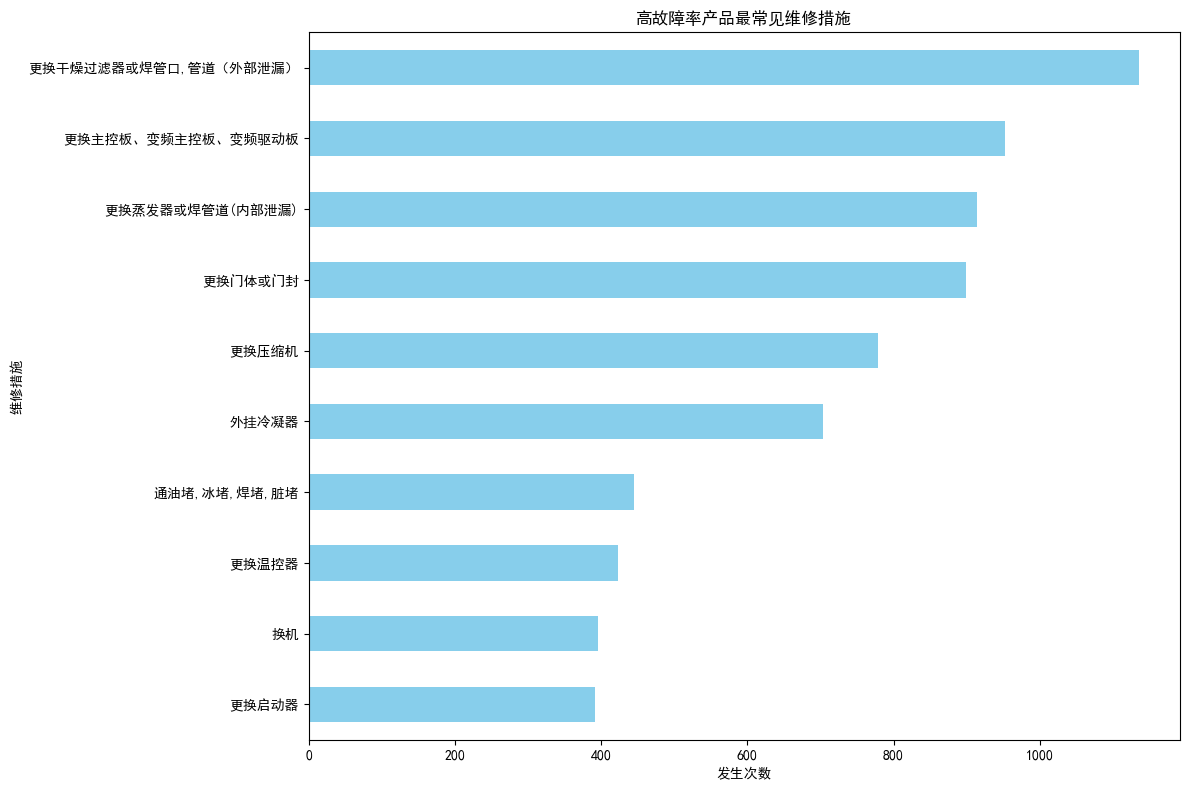

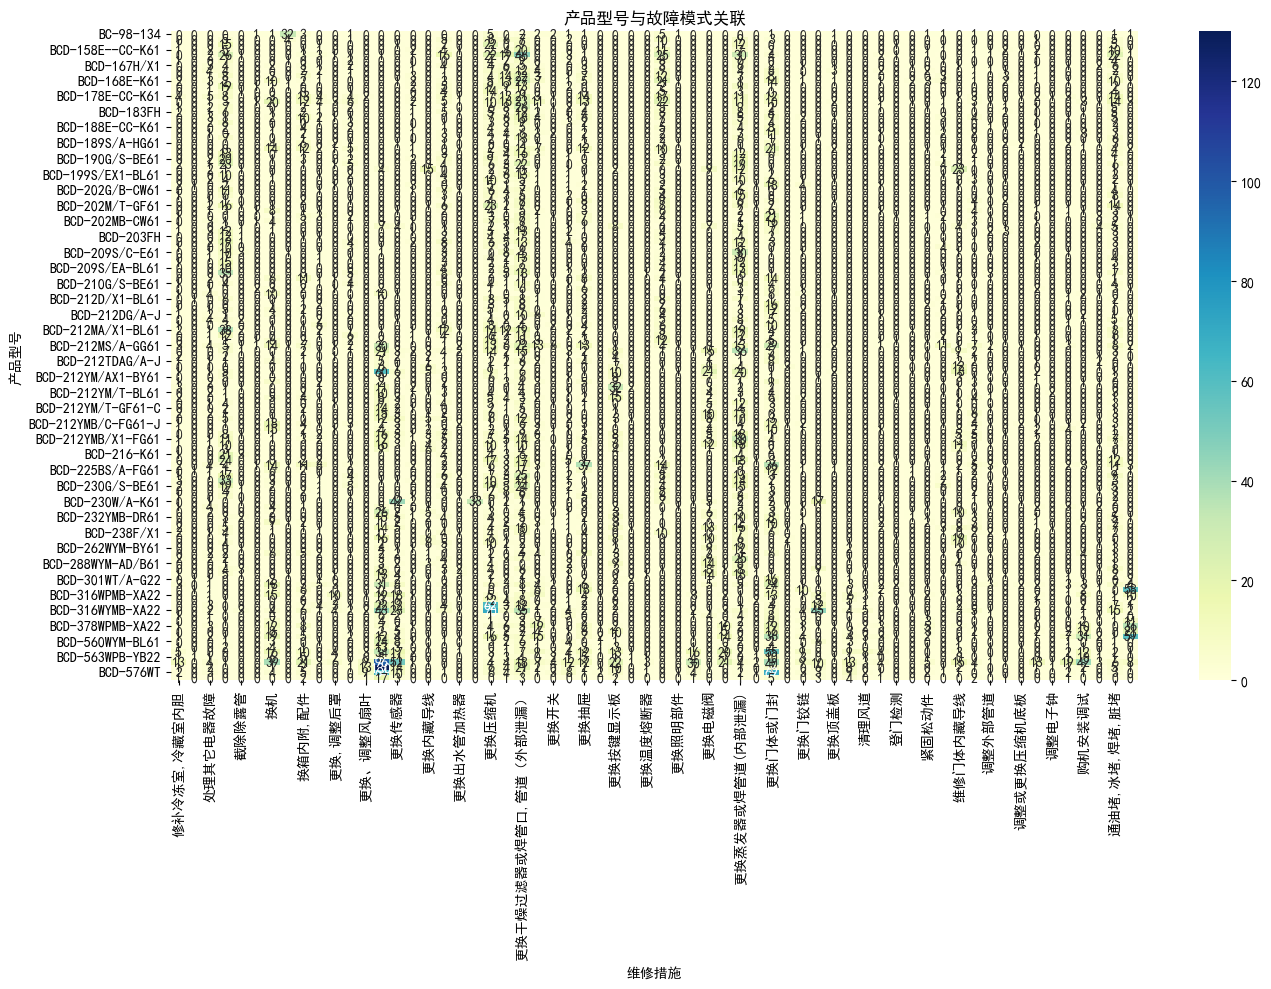


产品设计改进建议:
- 型号 BCD-563WY-C-Y34 (故障率: 3.0%, 平均故障年龄: 4.1月): 解决'更换主控板、变频主控板、变频驱动板'问题
- 型号 BCD-316WYMB-XA22 (故障率: 1.6%, 平均故障年龄: 13.9月): 解决'更换压缩机'问题 | 建议: 优化电机设计和散热系统
- 型号 BCD-562WT (故障率: 1.5%, 平均故障年龄: 3.8月): 解决'更换门体或门封'问题 | 建议: 改进密封条材料和安装工艺
- 型号 BCD-398WY-G22 (故障率: 1.4%, 平均故障年龄: 3.2月): 解决'门体换向'问题
- 型号 BCD-575WYM-E34 (故障率: 1.3%, 平均故障年龄: 18.5月): 解决'更换主控板、变频主控板、变频驱动板'问题
- 型号 BCD-576WT (故障率: 1.2%, 平均故障年龄: 14.1月): 解决'更换门体或门封'问题 | 建议: 改进密封条材料和安装工艺
- 型号 BCD-158E-K61 (故障率: 1.2%, 平均故障年龄: 16.6月): 解决'更换干燥过滤器或焊管口,管道（外部泄漏）'问题 | 建议: 加强密封工艺和材料耐腐蚀性
- 型号 BCD-212MS/A-GG61 (故障率: 1.2%, 平均故障年龄: 6.2月): 解决'更换主控板、变频主控板、变频驱动板'问题
- 型号 BCD-219S/K-GG61 (故障率: 1.0%, 平均故障年龄: 5.7月): 解决'更换抽屉'问题
- 型号 BCD-178E-K61 (故障率: 1.0%, 平均故障年龄: 7.9月): 解决'更换干燥过滤器或焊管口,管道（外部泄漏）'问题 | 建议: 加强密封工艺和材料耐腐蚀性


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
import re
import warnings
import pmdarima as pm
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载清洗后的数据
a = pd.read_excel('data2_processed1.xlsx')
b = a
target_columns1 = ['维修措施'] 
target_columns2 = ['实际服务方式']
df_cleaned1 = a[target_columns1].replace('', pd.NA)
df_cleaned2 = b[target_columns2].replace('', pd.NA)
mask = (
    df_cleaned1.notna().all(axis=1) &
    ~a[target_columns1].isin(['上门解释指导', '鉴定']).any(axis=1)
)
mask1 = (df_cleaned2.notna().all(axis=1))
df = a[mask] 
c=b[mask1]
df['购机日期'] = pd.to_datetime(df['购机日期'], format='%Y/%m/%d', errors='coerce')

def product_defect_root_cause(df):
    """产品缺陷根因分析"""
    print("\n" + "="*50)
    print("产品缺陷根因分析")
    print("="*50)
    
    # 创建数据副本避免修改原始数据
    analysis_df = df.copy()
    
    # 按产品型号分析故障率
    model_failure = analysis_df.groupby('产品型号').agg(
        failure_count=('产品型号', 'count'),  # 使用产品型号计数
        avg_failure_age=('设备年龄(月)', 'mean')
    ).reset_index()
    
    # 计算故障率
    model_failure['failure_rate'] = model_failure['failure_count'] / model_failure['failure_count'].sum()
    
    # 识别高故障率型号（前10%）
    high_failure_models = model_failure[
        model_failure['failure_rate'] > model_failure['failure_rate'].quantile(0.9)
    ].sort_values('failure_rate', ascending=False)
    
    print("\n高故障率产品型号 (前10%):")
    print(high_failure_models.head(10))
    
    # 故障模式分析
    if not high_failure_models.empty:
        # 只分析高故障率型号
        high_failure_data = analysis_df[analysis_df['产品型号'].isin(high_failure_models['产品型号'])]
        
        # 分析最常见故障模式
        top_failure_patterns = high_failure_data['维修措施'].value_counts().head(10)
        
        print("\n最常见故障模式:")
        print(top_failure_patterns)
        
        # 可视化故障模式分布
        plt.figure(figsize=(12, 8))
        top_failure_patterns.plot(kind='barh', color='skyblue')
        plt.title('高故障率产品最常见维修措施')
        plt.xlabel('发生次数')
        plt.ylabel('维修措施')
        plt.gca().invert_yaxis()  # 反转Y轴使最多的在顶部
        plt.tight_layout()
        plt.savefig('top_failure_patterns.png')
        plt.show()
    else:
        print("\n没有高故障率产品型号可供分析")
        top_failure_patterns = pd.Series()
    
    # 故障模式与产品型号关联分析
    if not high_failure_models.empty:
        # 创建故障-型号关联矩阵
        failure_matrix = pd.crosstab(
            high_failure_data['产品型号'],
            high_failure_data['维修措施']
        )
        
        # 筛选高频故障模式（至少出现在5%的产品型号中）
        min_models = max(1, int(len(high_failure_models) * 0.05))
        common_failures = failure_matrix.sum(axis=0) > min_models
        common_failures = common_failures[common_failures].index
        failure_matrix = failure_matrix[common_failures]
        
        # 可视化热力图
        plt.figure(figsize=(14, 10))
        sns.heatmap(failure_matrix, cmap='YlGnBu', annot=True, fmt='d')
        plt.title('产品型号与故障模式关联')
        plt.xlabel('维修措施')
        plt.ylabel('产品型号')
        plt.tight_layout()
        plt.savefig('model_failure_association.png')
        plt.show()
    else:
        failure_matrix = pd.DataFrame()
    
    # 生成设计改进建议
    improvement_suggestions = []
    for _, row in high_failure_models.iterrows():
        model = row['产品型号']
        model_data = analysis_df[analysis_df['产品型号'] == model]
        
        if not model_data.empty:
            # 最常见的维修措施
            top_failure = model_data['维修措施'].value_counts().index[0]
            
            # 平均故障年龄
            avg_age = row['avg_failure_age']
            
            # 生成建议
            suggestion = f"型号 {model} (故障率: {row['failure_rate']:.1%}, 平均故障年龄: {avg_age:.1f}月): 解决'{top_failure}'问题"
            
            # 根据故障类型添加具体建议
            if "蒸发器" in top_failure or "管道" in top_failure:
                suggestion += " | 建议: 加强密封工艺和材料耐腐蚀性"
            elif "压缩机" in top_failure:
                suggestion += " | 建议: 优化电机设计和散热系统"
            elif "温控器" in top_failure:
                suggestion += " | 建议: 改进触点材料和防潮设计"
            elif "电路" in top_failure or "主板" in top_failure:
                suggestion += " | 建议: 增强防潮保护和电压稳定性"
            elif "门封" in top_failure:
                suggestion += " | 建议: 改进密封条材料和安装工艺"
            elif "冷凝器" in top_failure:
                suggestion += " | 建议: 检查制冷系统密封性和压缩机效率"
            
            improvement_suggestions.append(suggestion)
    
    print("\n产品设计改进建议:")
    for suggestion in improvement_suggestions[:10]:  # 最多显示10条
        print(f"- {suggestion}")
    
    return model_failure, failure_matrix

# 主执行函数
def main():
    
    model_failure, failure_matrix = product_defect_root_cause(df)

if __name__ == "__main__":
    main()        


区域备件需求预测


<Figure size 1400x800 with 0 Axes>

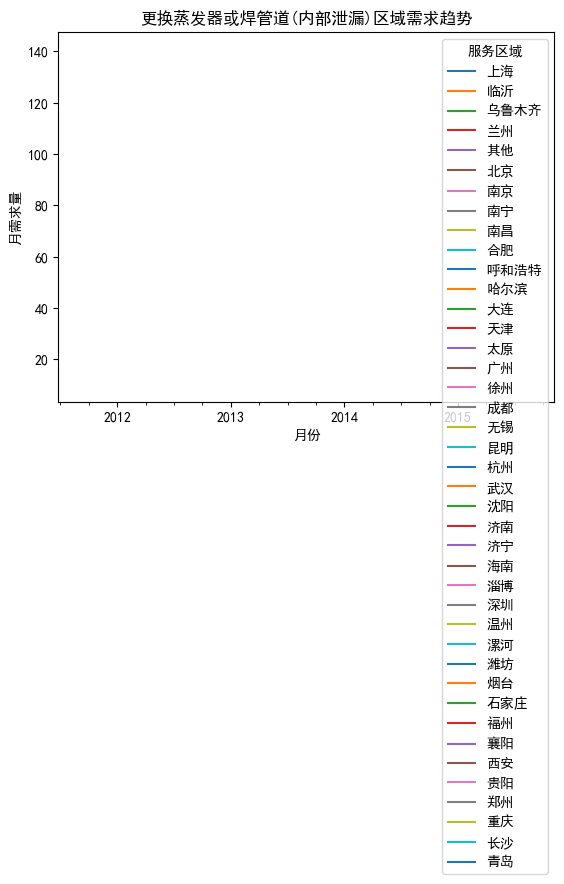

<Figure size 1400x800 with 0 Axes>

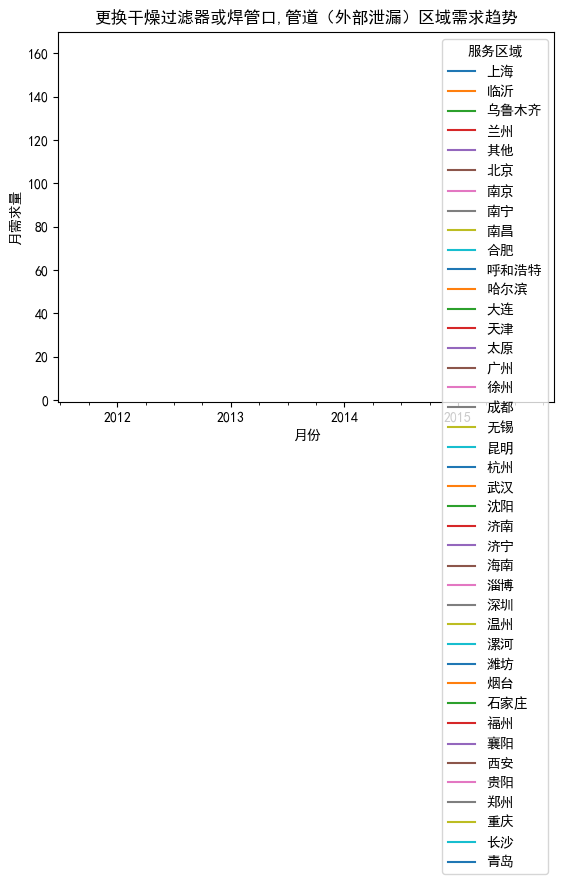

<Figure size 1400x800 with 0 Axes>

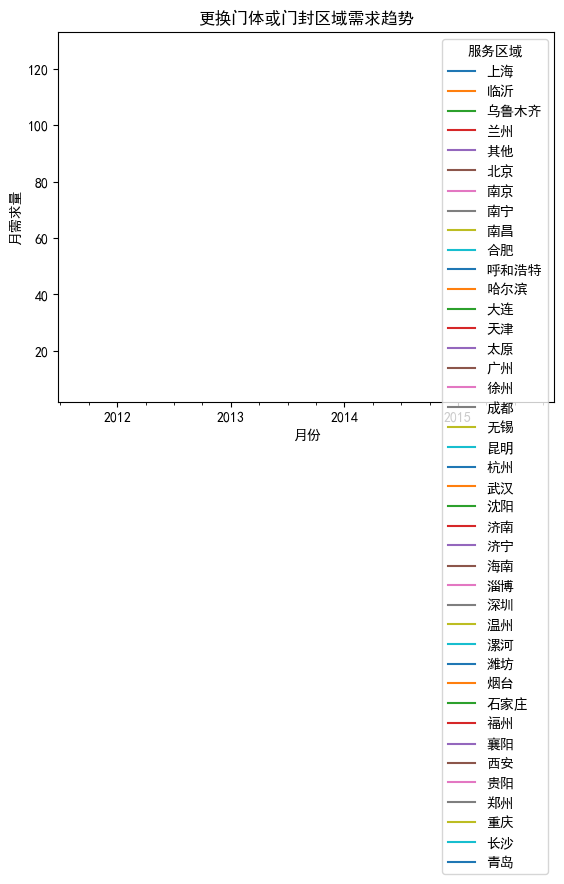

<Figure size 1400x800 with 0 Axes>

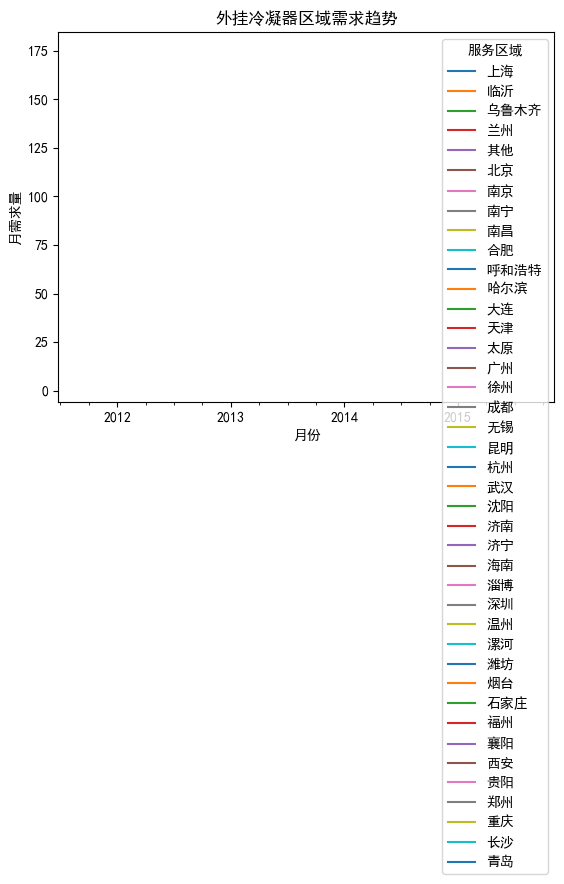

<Figure size 1400x800 with 0 Axes>

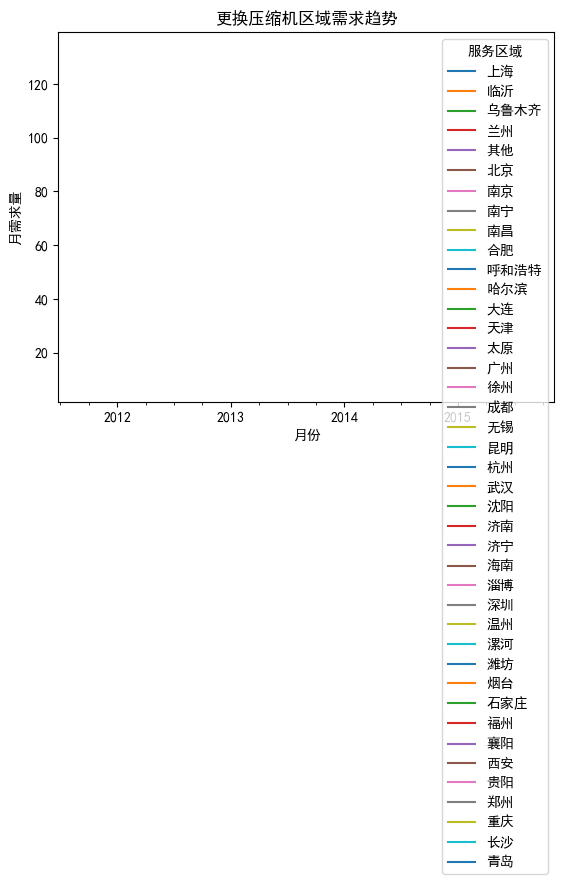


区域备件需求预测:

备件: 更换蒸发器或焊管道(内部泄漏)
  - 上海: SMA预测=nan, ES预测=26, 历史平均=26.0
  - 临沂: SMA预测=nan, ES预测=41, 历史平均=41.0
  - 乌鲁木齐: SMA预测=nan, ES预测=13, 历史平均=13.0
  - 兰州: SMA预测=nan, ES预测=18, 历史平均=18.0
  - 其他: SMA预测=nan, ES预测=17, 历史平均=17.0
  - 北京: SMA预测=nan, ES预测=63, 历史平均=63.0
  - 南京: SMA预测=nan, ES预测=29, 历史平均=29.0
  - 南宁: SMA预测=nan, ES预测=54, 历史平均=54.0
  - 南昌: SMA预测=nan, ES预测=141, 历史平均=141.0
  - 合肥: SMA预测=nan, ES预测=59, 历史平均=59.0
  - 呼和浩特: SMA预测=nan, ES预测=22, 历史平均=22.0
  - 哈尔滨: SMA预测=nan, ES预测=14, 历史平均=14.0
  - 大连: SMA预测=nan, ES预测=39, 历史平均=39.0
  - 天津: SMA预测=nan, ES预测=53, 历史平均=53.0
  - 太原: SMA预测=nan, ES预测=113, 历史平均=113.0
  - 广州: SMA预测=nan, ES预测=98, 历史平均=98.0
  - 徐州: SMA预测=nan, ES预测=33, 历史平均=33.0
  - 成都: SMA预测=nan, ES预测=79, 历史平均=79.0
  - 无锡: SMA预测=nan, ES预测=34, 历史平均=34.0
  - 昆明: SMA预测=nan, ES预测=10, 历史平均=10.0
  - 杭州: SMA预测=nan, ES预测=35, 历史平均=35.0
  - 武汉: SMA预测=nan, ES预测=78, 历史平均=78.0
  - 沈阳: SMA预测=nan, ES预测=24, 历史平均=24.0
  - 济南: SMA预测=nan, ES预测=41, 历史平均=41.0
  - 济宁: SMA预测=nan, ES预测=43, 历史平均=43.0
  - 海南: S

In [5]:
def regional_spare_parts_forecast(df, top_parts):
    """区域备件需求预测"""
    print("\n" + "="*50)
    print("区域备件需求预测")
    print("="*50)
    
    # 按区域和备件类型分析
    results = {}
    
    for part in top_parts:
        part_data = df[df['维修措施'] == part]
        
        # 按月按区域统计需求
        regional_demand = part_data.groupby(['服务区域', pd.Grouper(key='预约日期', freq='M')])['产品型号'].count().unstack(level=0)
        
        # 填充缺失值
        regional_demand = regional_demand.fillna(0)
        
        # 可视化
        plt.figure(figsize=(14, 8))
        regional_demand.plot(title=f'{part}区域需求趋势')
        plt.ylabel('月需求量')
        plt.xlabel('月份')
        plt.legend(title='服务区域')
        plt.tight_layout()
        plt.savefig(f'{part}_regional_demand.png')
        plt.show()
        
        # 预测每个区域的需求
        region_forecasts = {}
        for region in regional_demand.columns:
            demand_series = regional_demand[region]
            
            # 简单移动平均预测
            sma_forecast = demand_series.rolling(window=3).mean().iloc[-1]
            
            # 指数平滑预测
            alpha = 0.3
            es_forecast = demand_series.iloc[0]
            for value in demand_series.iloc[1:]:
                es_forecast = alpha * value + (1 - alpha) * es_forecast
            
            region_forecasts[region] = {
                'SMA预测': round(sma_forecast, 2),
                'ES预测': round(es_forecast, 2),
                '历史平均': round(demand_series.mean(), 2)
            }
        
        results[part] = region_forecasts
    
    # 输出预测结果
    print("\n区域备件需求预测:")
    for part, regions in results.items():
        print(f"\n备件: {part}")
        for region, data in regions.items():
            print(f"  - {region}: SMA预测={data['SMA预测']}, ES预测={data['ES预测']}, 历史平均={data['历史平均']}")
    
    return results

# 主执行函数
def main():
    
    top_parts = df['维修措施'].value_counts().head(5).index.tolist()
    regional_demand = regional_spare_parts_forecast(df, top_parts)

if __name__ == "__main__":
    main()            


基于市场级别和品牌的服务响应分析


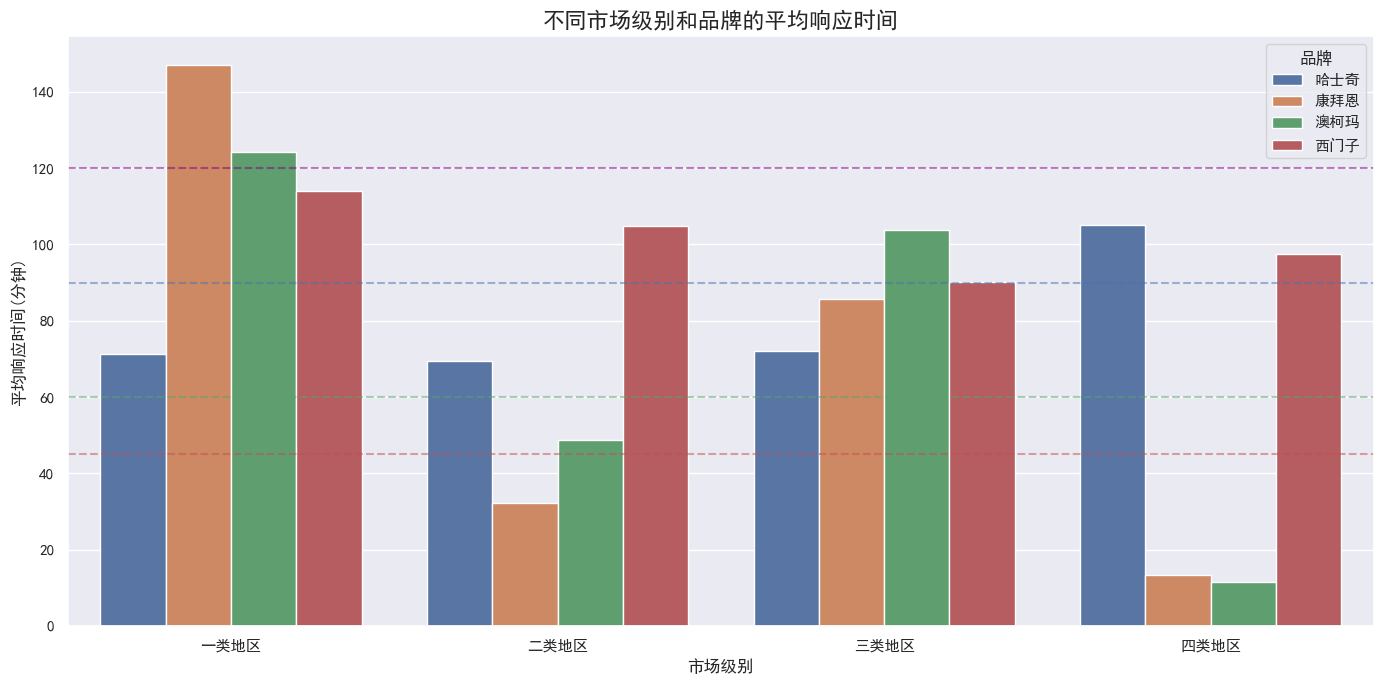

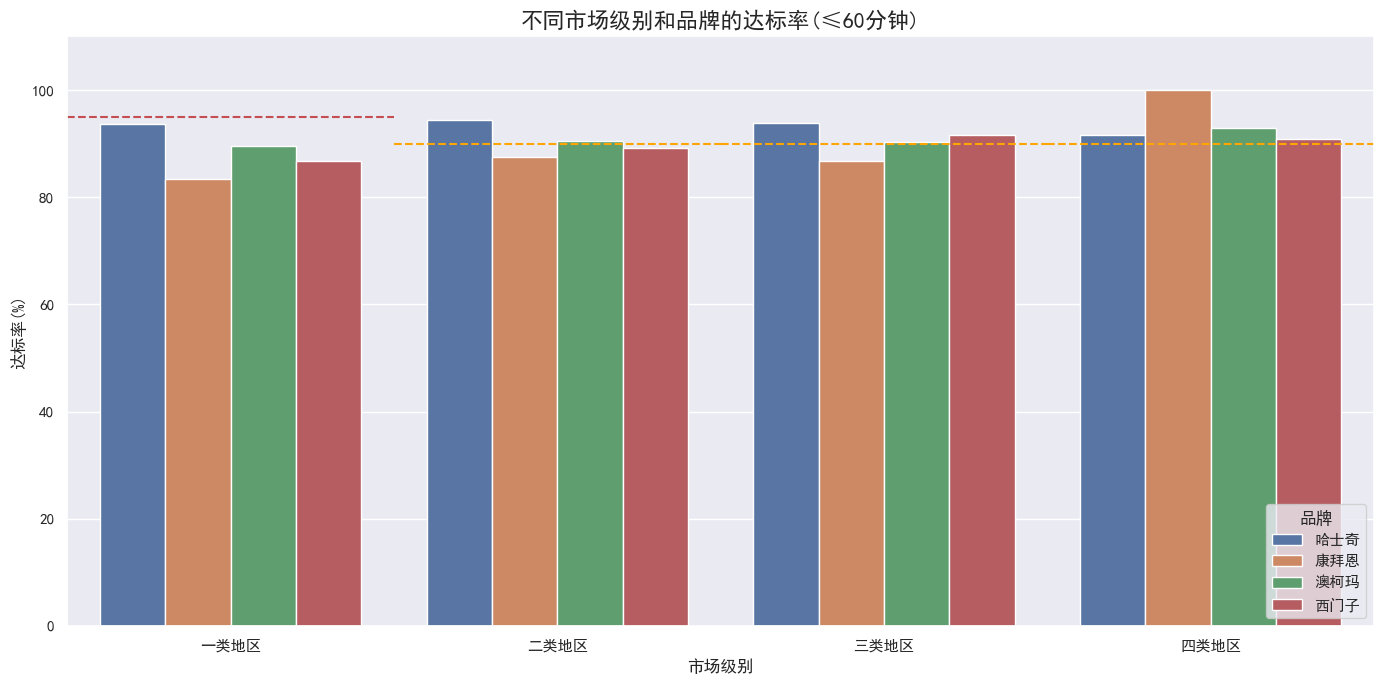

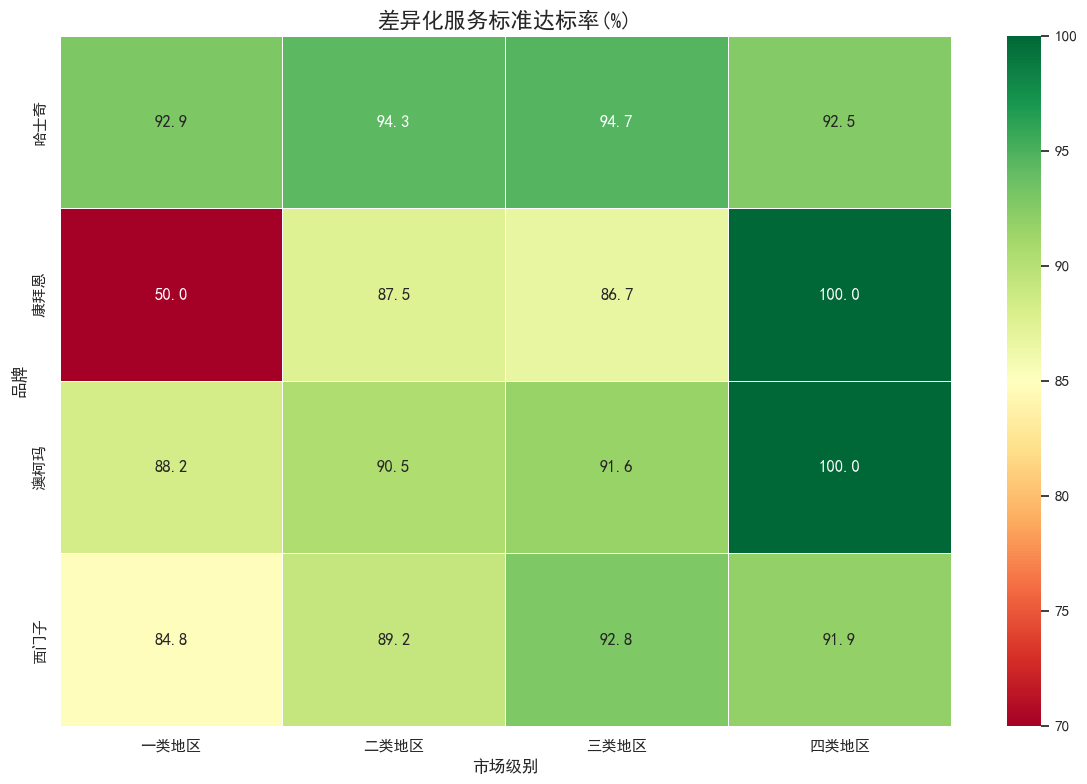


市场级别服务表现分析:

===== 一类地区地区 =====
服务标准: ≤45分钟, 目标差异化达标率: 95%
实际表现: 平均响应时间 88.4分钟, 差异化达标率 79.0%
主要问题: 平均响应时间(88.4分钟)超过标准(≤45分钟); 差异化达标率(79.0%)低于目标(95%); 品牌表现不佳: 哈士奇, 康拜恩, 澳柯玛, 西门子

品牌表现:
  - 哈士奇: 平均响应时间 71.3分钟, 差异化达标率 92.9%, 是否达标: 否
  - 康拜恩: 平均响应时间 147.1分钟, 差异化达标率 50.0%, 是否达标: 否
  - 澳柯玛: 平均响应时间 124.2分钟, 差异化达标率 88.2%, 是否达标: 否
  - 西门子: 平均响应时间 114.0分钟, 差异化达标率 84.8%, 是否达标: 否

改进建议:
  1. 实施VIP快速响应通道，确保45分钟内响应
  2. 增加一类地区服务人员配置，特别是高峰时段
  3. 建立一类地区专属服务团队
  4. 针对哈士奇品牌进行专项服务优化
  5. 针对康拜恩品牌进行专项服务优化
  6. 针对澳柯玛品牌进行专项服务优化
  7. 针对西门子品牌进行专项服务优化

===== 二类地区地区 =====
服务标准: ≤60分钟, 目标差异化达标率: 90%
实际表现: 平均响应时间 81.5分钟, 差异化达标率 90.4%
主要问题: 平均响应时间(81.5分钟)超过标准(≤60分钟); 品牌表现不佳: 康拜恩, 西门子

品牌表现:
  - 哈士奇: 平均响应时间 69.5分钟, 差异化达标率 94.3%, 是否达标: 是
  - 康拜恩: 平均响应时间 32.3分钟, 差异化达标率 87.5%, 是否达标: 否
  - 澳柯玛: 平均响应时间 48.8分钟, 差异化达标率 90.5%, 是否达标: 是
  - 西门子: 平均响应时间 104.8分钟, 差异化达标率 89.2%, 是否达标: 否

改进建议:
  1. 优化派工系统，减少调度时间
  2. 设置二类地区响应时间KPI考核
  3. 针对康拜恩品牌进行专项服务优化
  4. 针对西门子品牌进行专项服务优化

===== 三类地区地区 =====
服务标准: ≤90分钟, 目标差异化达标率: 85%
实际表现: 平

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl

warnings.filterwarnings('ignore')


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'sans-serif'
sns.set(font='SimHei')  # 使用列表中的第一个字体
sns.set_style("whitegrid")

df = pd.read_csv('data2_processed.csv')

def service_level_analysis(df):
    """
    基于市场级别和品牌的服务响应分析，重点关注地区差异化服务标准
    
    参数:
    df -- 包含市场级别、品牌、响应时间(分钟)等列的DataFrame
    
    返回:
    service_report -- 包含详细分析结果的报告
    """
    print("\n" + "="*60)
    print("基于市场级别和品牌的服务响应分析")
    print("="*60)
    
    # 检查必要列
    required_cols = ['市场级别', '品牌', '响应时间(分钟)']
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        print(f"错误：缺少必要列 {missing_cols}，无法进行分析")
        return None
    
    # 1. 计算达标率（响应时间≤60分钟）
    df['达标响应'] = df['响应时间(分钟)'] <= 60
    
    # 2. 按市场级别和品牌分组计算关键指标
    level_brand_stats = df.groupby(['市场级别', '品牌']).agg(
        total_orders=('达标响应', 'count'),
        avg_response_time=('响应时间(分钟)', 'mean'),
        median_response_time=('响应时间(分钟)', 'median'),
        pass_rate=('达标响应', 'mean'),
        delayed_rate=('响应时间(分钟)', lambda x: (x > 120).mean())
    ).reset_index()
    
    # 格式化百分比
    level_brand_stats['pass_rate'] = (level_brand_stats['pass_rate'] * 100).round(1)
    level_brand_stats['delayed_rate'] = (level_brand_stats['delayed_rate'] * 100).round(1)
    
    # 3. 按市场级别计算整体表现
    level_stats = df.groupby('市场级别').agg(
        total_orders=('达标响应', 'count'),
        avg_response_time=('响应时间(分钟)', 'mean'),
        pass_rate=('达标响应', 'mean'),
        delayed_rate=('响应时间(分钟)', lambda x: (x > 120).mean())
    ).reset_index()
    
    # 格式化百分比
    level_stats['pass_rate'] = (level_stats['pass_rate'] * 100).round(1)
    level_stats['delayed_rate'] = (level_stats['delayed_rate'] * 100).round(1)
    
    # 4. 设定差异化服务标准
    # 一类地区：最高标准（≤45分钟达标）
    # 二类地区：≤60分钟达标
    # 三类地区：≤90分钟达标
    # 四类地区：≤120分钟达标
    df['差异化达标'] = np.where(
        df['市场级别'] == '一类地区', df['响应时间(分钟)'] <= 45,
        np.where(
            df['市场级别'] == '二类地区', df['响应时间(分钟)'] <= 60,
            np.where(
                df['市场级别'] == '三类地区', df['响应时间(分钟)'] <= 90,
                df['响应时间(分钟)'] <= 120
            )
        )
    )
    
    # 计算差异化达标率
    level_brand_stats_diff = df.groupby(['市场级别', '品牌']).agg(
        diff_pass_rate=('差异化达标', 'mean')
    ).reset_index()
    level_brand_stats_diff['diff_pass_rate'] = (level_brand_stats_diff['diff_pass_rate'] * 100).round(1)
    
    # 合并结果
    level_brand_stats = level_brand_stats.merge(level_brand_stats_diff, on=['市场级别', '品牌'])
    
    # 5. 识别未达标情况
    level_brand_stats['未达标'] = level_brand_stats['diff_pass_rate'] < 90
    
    # 6. 可视化分析
    
    # 设置图表风格
    sns.set_style("whitegrid")
    sns.set_palette("Set2")
    sns.set(font='SimHei')
    
    # 图1：各市场级别平均响应时间
    plt.figure(figsize=(14, 7))
    ax1 = sns.barplot(
        x='市场级别', 
        y='avg_response_time', 
        hue='品牌',
        data=level_brand_stats,
        order=['一类地区', '二类地区', '三类地区', '四类地区']
    )
    plt.title('不同市场级别和品牌的平均响应时间', fontsize=16)
    plt.ylabel('平均响应时间(分钟)', fontsize=12)
    plt.xlabel('市场级别', fontsize=12)
    plt.legend(title='品牌', loc='upper right')
    
    # 添加差异化标准线
    ax1.axhline(45, color='r', linestyle='--', alpha=0.5, label='一类标准(45分钟)')
    ax1.axhline(60, color='g', linestyle='--', alpha=0.5, label='二类标准(60分钟)')
    ax1.axhline(90, color='b', linestyle='--', alpha=0.5, label='三类标准(90分钟)')
    ax1.axhline(120, color='purple', linestyle='--', alpha=0.5, label='四类标准(120分钟)')
    
    plt.tight_layout()
    plt.savefig('response_time_by_level_brand.png')
    plt.show()
    
    # 图2：各市场级别达标率
    plt.figure(figsize=(14, 7))
    ax2 = sns.barplot(
        x='市场级别', 
        y='pass_rate', 
        hue='品牌',
        data=level_brand_stats,
        order=['一类地区', '二类地区', '三类地区', '四类地区']
    )
    plt.title('不同市场级别和品牌的达标率(≤60分钟)', fontsize=16)
    plt.ylabel('达标率(%)', fontsize=12)
    plt.xlabel('市场级别', fontsize=12)
    plt.ylim(0, 110)
    plt.legend(title='品牌', loc='lower right')
    
    # 添加目标线
    for i, level in enumerate(['一类地区', '二类地区', '三类地区', '四类地区']):
        target = 95 if level == '一类地区' else 90
        plt.axhline(target, xmin=i*0.25, xmax=(i+1)*0.25, 
                   color='r' if level == '一类地区' else 'orange', 
                   linestyle='--')
    
    plt.tight_layout()
    plt.savefig('pass_rate_by_level_brand.png')
    plt.show()
    
    # 图3：差异化达标率热力图
    plt.figure(figsize=(12, 8))
    # 确保所有市场级别都存在
    all_levels = ['一类地区', '二类地区', '三类地区', '四类地区']
    pivot_table = level_brand_stats.pivot(index='品牌', columns='市场级别', values='diff_pass_rate')
    
    # 添加缺失的市场级别列（如果不存在）
    for level in all_levels:
        if level not in pivot_table.columns:
            pivot_table[level] = np.nan
    
    # 重新排序列
    pivot_table = pivot_table[all_levels]
    
    sns.heatmap(
        pivot_table, 
        annot=True, 
        fmt=".1f", 
        cmap="RdYlGn", 
        vmin=70, 
        vmax=100,
        linewidths=0.5
    )
    plt.title('差异化服务标准达标率(%)', fontsize=16)
    plt.ylabel('品牌', fontsize=12)
    plt.xlabel('市场级别', fontsize=12)
    plt.tight_layout()
    plt.savefig('diff_pass_rate_heatmap.png')
    plt.show()
    
    # 7. 生成分析报告和改进建议
    service_report = []
    
    # 获取实际存在的市场级别
    existing_levels = level_stats['市场级别'].unique()
    
    # 按市场级别分析
    for level in ['一类地区', '二类地区', '三类地区', '四类地区']:
        # 如果该级别不存在于数据中，则跳过
        if level not in existing_levels:
            print(f"警告: 市场级别 '{level}' 在数据中不存在，跳过分析")
            continue
            
        # 获取该级别的统计数据
        level_data = level_stats[level_stats['市场级别'] == level]
        if level_data.empty:
            print(f"警告: 市场级别 '{level}' 在level_stats中没有数据")
            continue
            
        level_df = level_data.iloc[0]
        
        # 获取该级别的品牌数据
        level_brand_data = level_brand_stats[level_brand_stats['市场级别'] == level]
        
        # 确定该级别的标准
        if level == '一类地区':
            standard = "≤45分钟"
            target_rate = 95
        elif level == '二类地区':
            standard = "≤60分钟"
            target_rate = 90
        elif level == '三类地区':
            standard = "≤90分钟"
            target_rate = 85
        else:  # 四类
            standard = "≤120分钟"
            target_rate = 80
        
        # 品牌表现分析
        brand_performance = []
        for _, row in level_brand_data.iterrows():
            performance = {
                "品牌": row['品牌'],
                "平均响应时间": f"{row['avg_response_time']:.1f}分钟",
                "差异化达标率": f"{row['diff_pass_rate']:.1f}%",
                "是否达标": "是" if row['diff_pass_rate'] >= target_rate else "否"
            }
            brand_performance.append(performance)
        
        # 主要问题识别 - 使用差异化达标率
        problems = []
        standard_clean = standard.replace("≤", "").replace("分钟", "").strip()
        standard_time = float(standard_clean)  
        
        if level_df['avg_response_time'] > standard_time:
            problems.append(f"平均响应时间({level_df['avg_response_time']:.1f}分钟)超过标准({standard})")
        
        # 获取该级别的差异化达标率
        level_diff_pass_rate = level_brand_data['diff_pass_rate'].mean()
        if level_diff_pass_rate < target_rate:
            problems.append(f"差异化达标率({level_diff_pass_rate:.1f}%)低于目标({target_rate}%)")
        
        # 改进建议
        suggestions = []
        if level == '一类地区':
            suggestions.append("实施VIP快速响应通道，确保45分钟内响应")
            suggestions.append("增加一类地区服务人员配置，特别是高峰时段")
            suggestions.append("建立一类地区专属服务团队")
        elif level == '二类地区':
            suggestions.append("优化派工系统，减少调度时间")
            suggestions.append("设置二类地区响应时间KPI考核")
        elif level == '三类地区':
            suggestions.append("加强三类地区技术人员培训")
            suggestions.append("优化备件物流，减少等待时间")
        else:  # 四类
            suggestions.append("建立四类地区远程支持体系")
            suggestions.append("与当地维修点建立合作伙伴关系")
        
        # 针对表现不佳的品牌
        underperforming_brands = []
        if not level_brand_data.empty:
            underperforming_brands = level_brand_data[
                level_brand_data['diff_pass_rate'] < target_rate
            ]['品牌'].tolist()
            
            if underperforming_brands:
                problems.append(f"品牌表现不佳: {', '.join(underperforming_brands)}")
                for brand in underperforming_brands:
                    suggestions.append(f"针对{brand}品牌进行专项服务优化")
        
        # 汇总报告
        report_entry = {
            "市场级别": level,
            "服务标准": standard,
            "目标达标率": f"{target_rate}%",
            "实际平均响应时间": f"{level_df['avg_response_time']:.1f}分钟",
            "实际差异化达标率": f"{level_diff_pass_rate:.1f}%",
            "工单总数": int(level_df['total_orders']),
            "主要问题": "; ".join(problems) if problems else "符合服务标准",
            "品牌表现": brand_performance,
            "改进建议": suggestions
        }
        
        service_report.append(report_entry)
    
    # 8. 打印分析结果
    print("\n市场级别服务表现分析:")
    for report in service_report:
        print(f"\n===== {report['市场级别']} =====")
        print(f"服务标准: {report['服务标准']}, 目标差异化达标率: {report['目标达标率']}")
        print(f"实际表现: 平均响应时间 {report['实际平均响应时间']}, 差异化达标率 {report['实际差异化达标率']}")
        print(f"主要问题: {report['主要问题']}")
        
        print("\n品牌表现:")
        for brand in report['品牌表现']:
            print(f"  - {brand['品牌']}: 平均响应时间 {brand['平均响应时间']}, "
                  f"差异化达标率 {brand['差异化达标率']}, 是否达标: {brand['是否达标']}")
        
        print("\n改进建议:")
        for i, suggestion in enumerate(report['改进建议'], 1):
            print(f"  {i}. {suggestion}")
    
    # 9. 整体战略建议
    print("\n整体战略建议:")
    print("1. 实施差异化服务标准体系:")
    print("   - 一类地区: ≤45分钟响应 (VIP标准)")
    print("   - 二类地区: ≤60分钟响应 (优质标准)")
    print("   - 三类地区: ≤90分钟响应 (标准服务)")
    print("   - 四类地区: ≤120分钟响应 (基础服务)")
    print("2. 资源配置优化:")
    print("   - 一类地区: 配置最优质资源，建立快速响应团队")
    print("   - 二类地区: 优化调度系统，提升效率")
    print("   - 三四类地区: 加强合作伙伴网络，降低运营成本")
    print("3. 品牌专项优化:")
    print("   - 针对各市场级别中表现不佳的品牌制定专项改进计划")
    print("4. 建立服务表现监控系统:")
    print("   - 实时跟踪各地区各品牌的服务表现")
    print("   - 设置自动预警机制，对未达标情况及时干预")
    
    return service_report

# 主执行函数
def main():
    service_report = service_level_analysis(df)

if __name__ == "__main__":
    main()